In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam, SGD
import pandas as pd


2023-12-23 21:03:22.594548: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-23 21:03:22.655225: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-23 21:03:22.655289: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-23 21:03:22.657018: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-23 21:03:22.667116: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-23 21:03:22.668821: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
print(f"X_train:{X_train_full.shape}\t  y_train:{y_train_full.shape}\n X_test:{X_test.shape}\t y_test:{y_test.shape}")


X_train:(60000, 28, 28)	  y_train:(60000,)
 X_test:(10000, 28, 28)	 y_test:(10000,)


In [5]:
X_cv, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:]/255.0
y_cv, y_train = y_train_full[:5000], y_train_full[5000:]

In [41]:
model = Sequential(
    [
    Flatten(input_shape=[28, 28]), 
    Dense(300, activation="relu", name="layer1"), 
    Dense(100, activation="relu", name="layer2"), 
    Dense(10, activation="softmax", name="layer3")
    ], name="classifier"
)

In [42]:
model.summary()


Model: "classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 300)               235500    
                                                                 
 layer2 (Dense)              (None, 100)               30100     
                                                                 
 layer3 (Dense)              (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
model.layers

In [44]:
model.compile(loss=SparseCategoricalCrossentropy(), 
              optimizer=SGD(), 
              metrics=tf.keras.metrics.sparse_categorical_accuracy)

In [45]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_cv, y_cv))

Epoch 1/30


2023-12-23 21:27:20.191124: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 4s 2ms/step - loss: 0.7182 - sparse_categorical_accuracy: 0.7658 - val_loss: 0.5351 - val_sparse_categorical_accuracy: 0.8170
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4868 - sparse_categorical_accuracy: 0.8325 - val_loss: 0.4545 - val_sparse_categorical_accuracy: 0.8418
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4434 - sparse_categorical_accuracy: 0.8462 - val_loss: 0.4150 - val_sparse_categorical_accuracy: 0.8568
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4153 - sparse_categorical_accuracy: 0.8552 - val_loss: 0.4055 - val_sparse_categorical_accuracy: 0.8562
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3941 - sparse_categorical_accuracy: 0.8628 - val_loss: 0.3737 - val_sparse_categorical_accuracy: 0.8696
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3795 - sparse_categoric

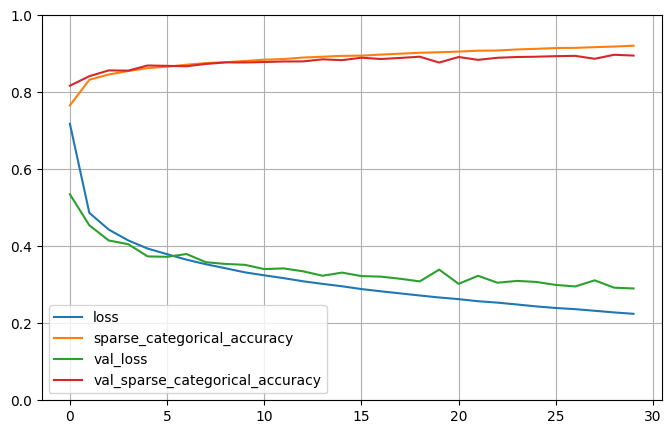

In [46]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


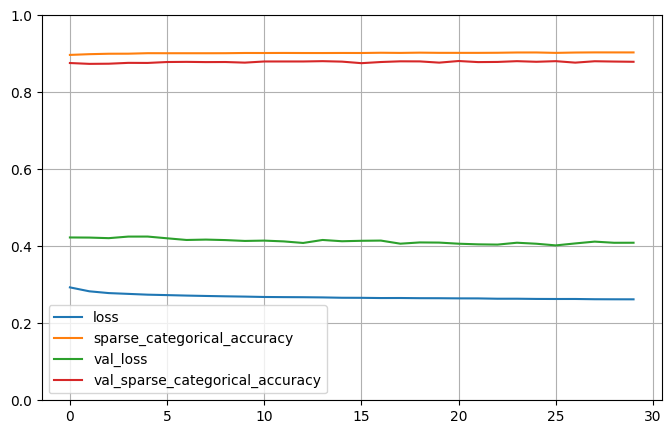

In [35]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

#this one is from last layer activation = linear, and from_logits = true for sparsecategorical cross entropy

In [47]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 54.8206 - sparse_categorical_accuracy: 0.8643


[54.82059860229492, 0.864300012588501]

In [48]:
X_new=X_test[:3]
y_proba = model.predict(X_new)

1/1 [==============================] - 0s 41ms/step


In [51]:
y_proba

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [53]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)